# <span style = "color:#FFFFFF; background-color: #FF99AA"> Boston 주택 가격 예측 모델</span>

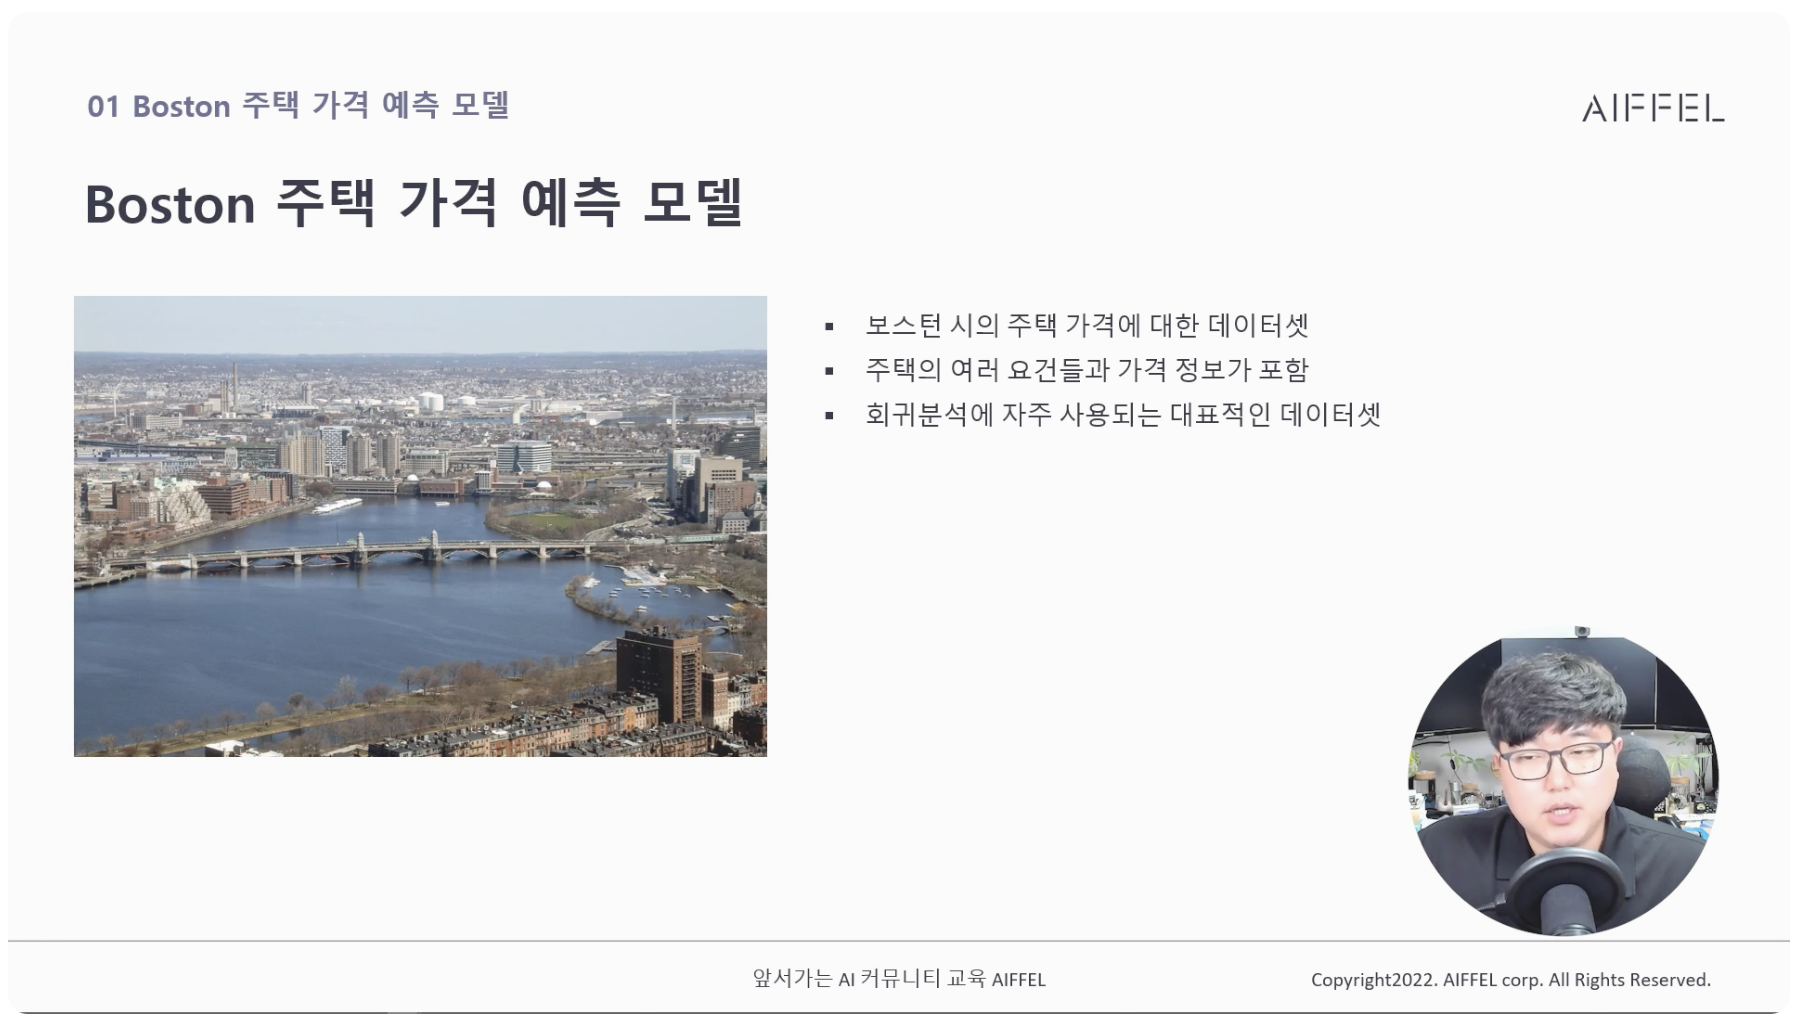

### <span style = "background-color: #FFDDE5"> 데이터 로드 및 전처리</span>
---
- 먼저 데이터를 불러와 확인해 보고 전처리를 해 봅시다.
- 데이터셋은 **`keras.datasets`** 에서 불러올 수 있는 boston_housing 데이터셋을 활용합니다.

In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

404
102


- 데이터셋의 전처리를 위해 표준화 작업을 수행해야 합니다. 아래의 주석을 보고 코드를 작성해 보세요.

In [3]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
mean = train_data.mean(axis=0)
train_data = train_data - mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
std = train_data.std(axis=0)
train_data = train_data / std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data = test_data - mean
test_data = test_data / std

### <span style = "background-color: #FFDDE5"> 모델 구성 및 컴파일</span>
---
- 주택 가격 예측을 위한 딥러닝 모델을 구성하고 컴파일합니다. Sequential() 함수를 이용한 Sequential API 방법으로 딥러닝 모델을 구성해 보세요.
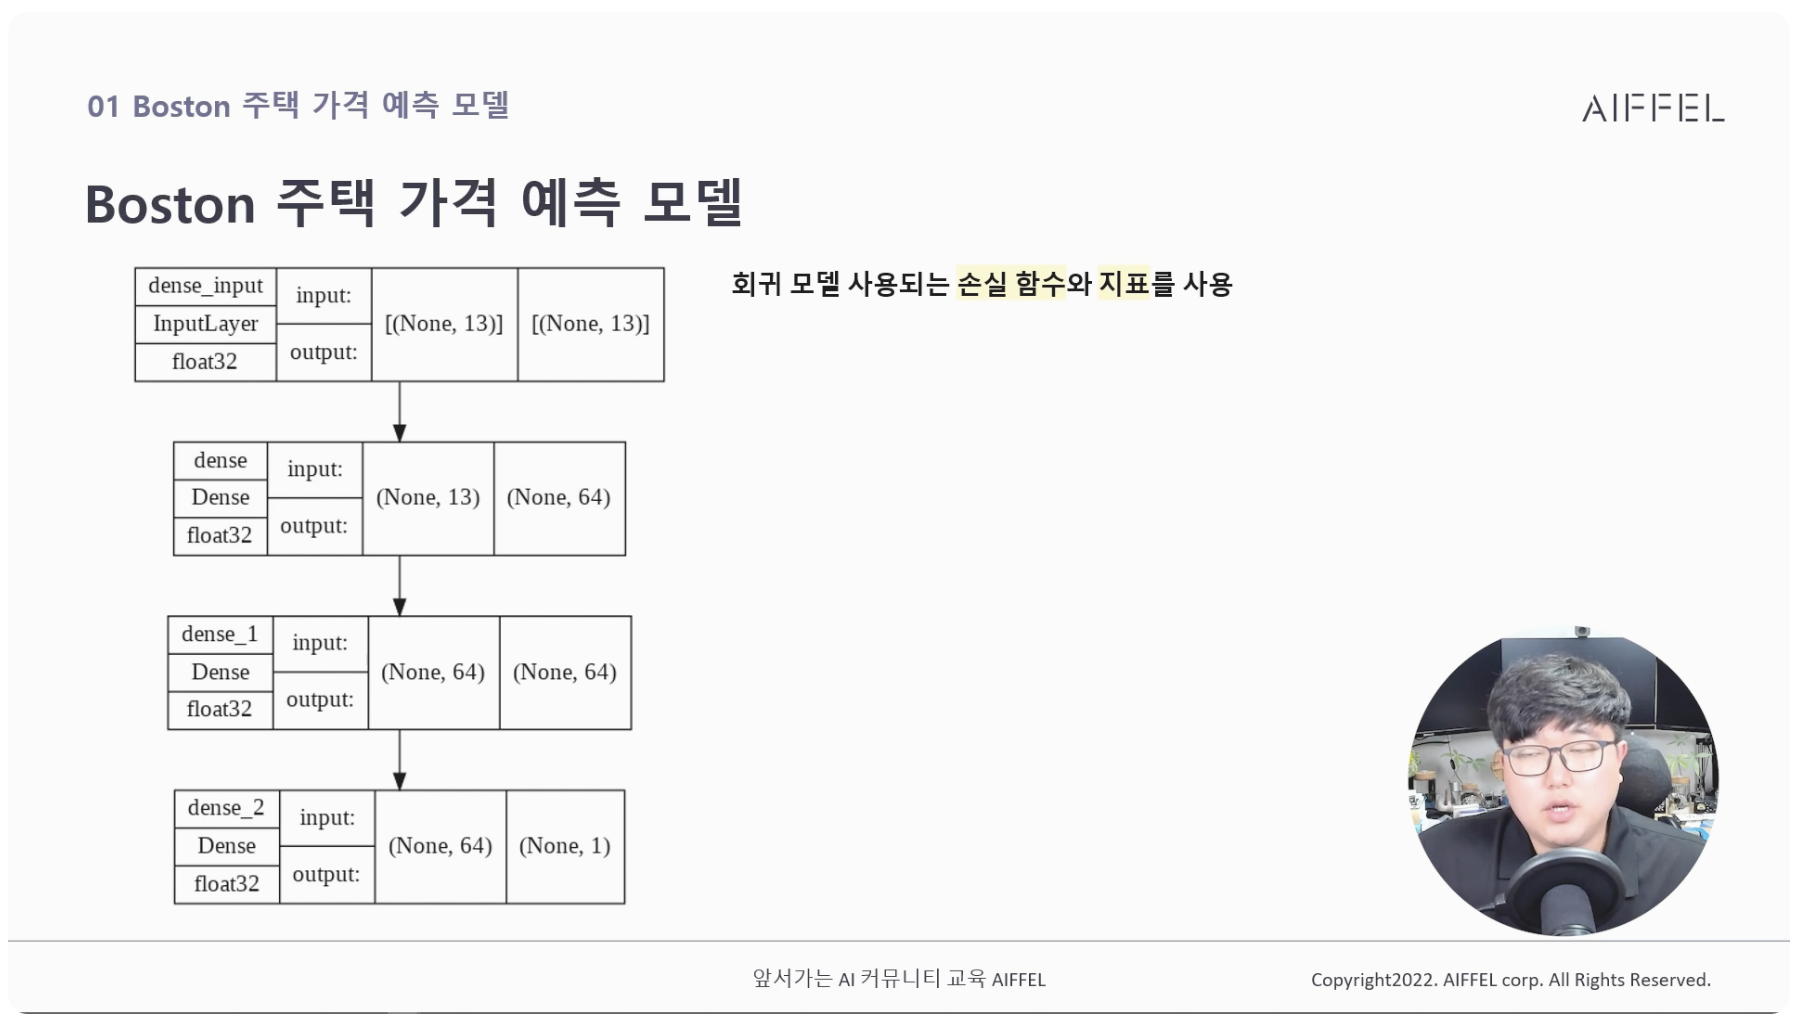

In [4]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
model = models.Sequential()

### 비교대조의 편의를 위하여 제시 모델 구조도와 동일한 레이어명 사용
model.add(layers.Input(shape=(train_data.shape[1],), name='dense_input'))
model.add(layers.Dense(64, name='dense'))
model.add(layers.Dense(64, name='dense1'))
model.add(layers.Dense(1, name='dense2'))

model.summary()



# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
model.compile(loss='mse', metrics=['mae'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense1 (Dense)               (None, 64)                4160      
_________________________________________________________________
dense2 (Dense)               (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


### <span style = "background-color: #FFDDE5"> 모델 학습</span>
---
- epochs와 batch size는 자유롭게 설정해 보세요. 모델 학습 후에는 모델 학습 결과를 시각화해 보세요.
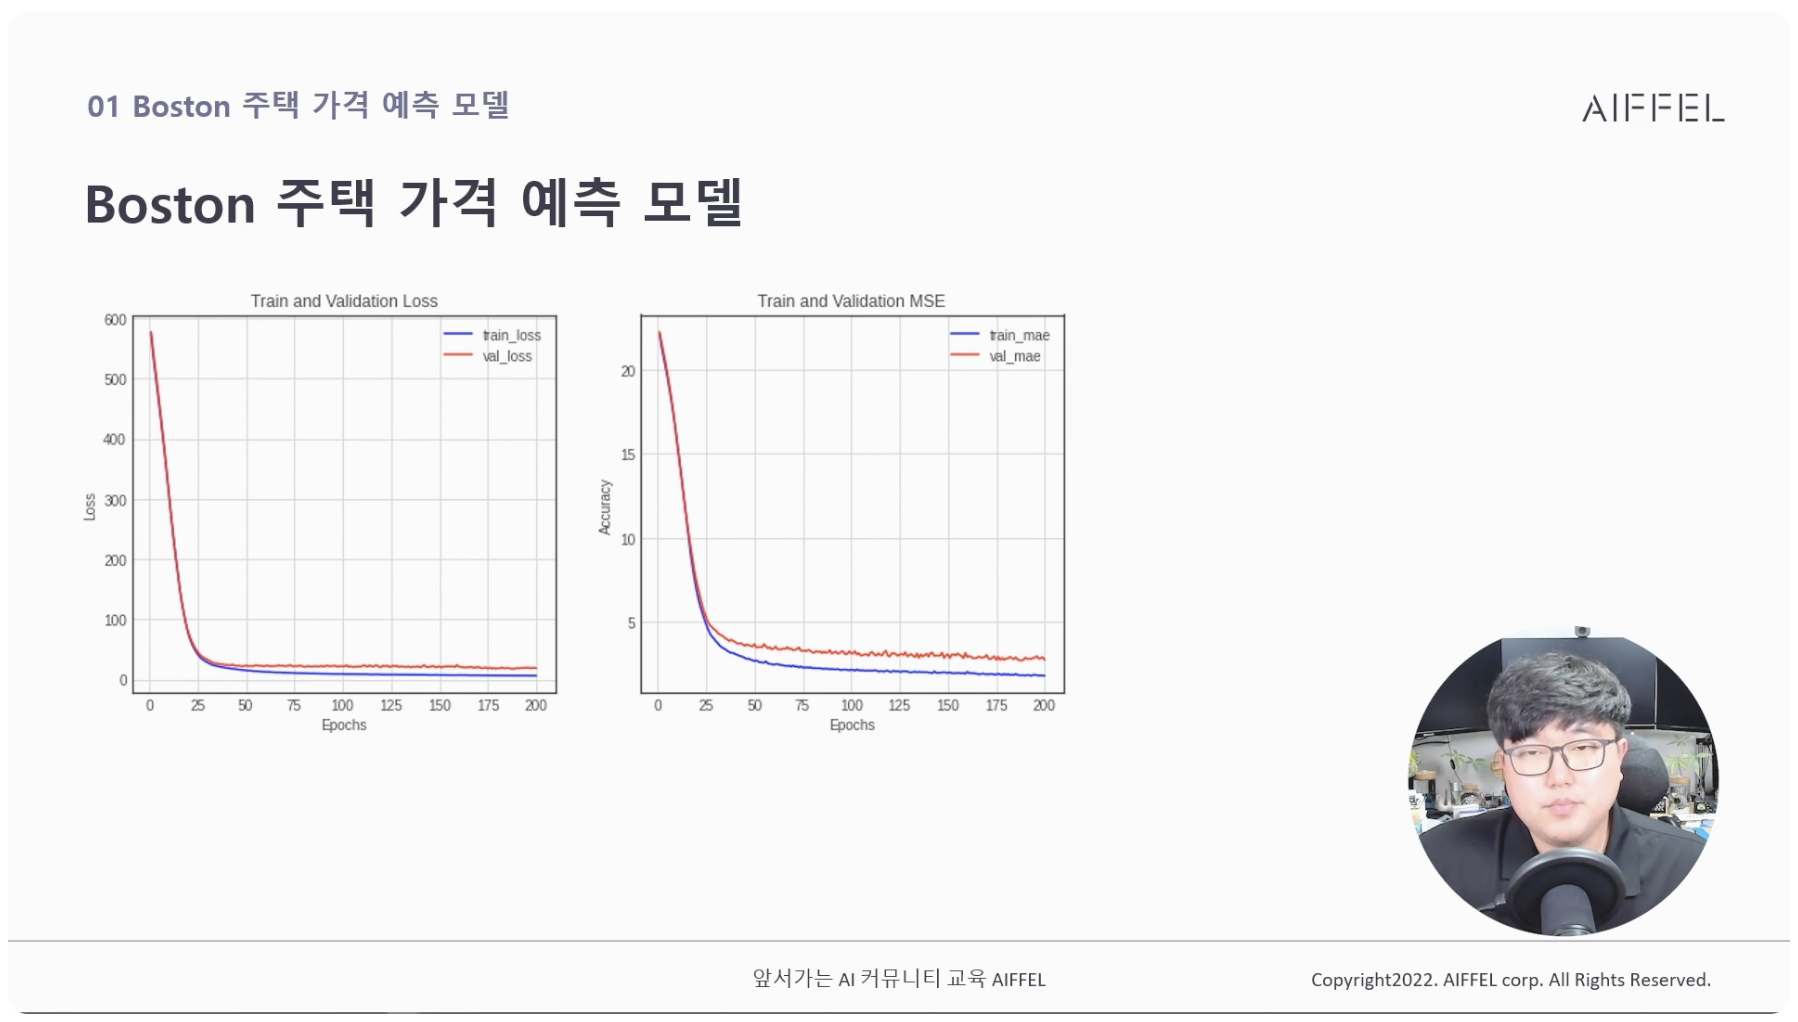

In [5]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
history = model.fit(train_data, train_labels,
                    epochs=200, ### 제시된 시각화 그래프는 약 200 epochs 학습을 수행하였으므로 동일하게 진행
                    batch_size=64,
                    validation_split=0.25)

Epoch 1/200
5/5 [==============================] - 1s 35ms/step - loss: 543.3138 - mae: 21.7460 - val_loss: 655.5466 - val_mae: 23.8408
Epoch 2/200
5/5 [==============================] - 0s 7ms/step - loss: 523.6624 - mae: 21.6041 - val_loss: 630.8924 - val_mae: 23.5232
Epoch 3/200
5/5 [==============================] - 0s 7ms/step - loss: 510.6074 - mae: 21.5185 - val_loss: 611.7969 - val_mae: 23.2494
Epoch 4/200
5/5 [==============================] - 0s 7ms/step - loss: 499.3235 - mae: 21.3823 - val_loss: 595.0159 - val_mae: 22.9880
Epoch 5/200
5/5 [==============================] - 0s 6ms/step - loss: 488.4698 - mae: 21.2045 - val_loss: 579.1510 - val_mae: 22.7259
Epoch 6/200
5/5 [==============================] - 0s 7ms/step - loss: 476.6496 - mae: 20.9930 - val_loss: 560.8489 - val_mae: 22.4022
Epoch 7/200
5/5 [==============================] - 0s 7ms/step - loss: 465.0541 - mae: 20.7861 - val_loss: 545.9142 - val_mae: 22.1442
Epoch 8/200
5/5 [==============================] - 0s 

Epoch 124/200
5/5 [==============================] - 0s 6ms/step - loss: 21.0507 - mae: 3.2628 - val_loss: 29.3687 - val_mae: 3.6510
Epoch 125/200
5/5 [==============================] - 0s 7ms/step - loss: 20.9173 - mae: 3.1911 - val_loss: 29.3814 - val_mae: 3.6949
Epoch 126/200
5/5 [==============================] - 0s 6ms/step - loss: 21.0795 - mae: 3.2514 - val_loss: 32.0853 - val_mae: 3.8841
Epoch 127/200
5/5 [==============================] - 0s 6ms/step - loss: 21.0759 - mae: 3.2067 - val_loss: 28.8187 - val_mae: 3.5668
Epoch 128/200
5/5 [==============================] - 0s 7ms/step - loss: 21.0571 - mae: 3.2519 - val_loss: 33.9295 - val_mae: 4.0029
Epoch 129/200
5/5 [==============================] - 0s 7ms/step - loss: 21.7743 - mae: 3.2663 - val_loss: 31.6749 - val_mae: 3.8454
Epoch 130/200
5/5 [==============================] - 0s 7ms/step - loss: 20.4907 - mae: 3.1341 - val_loss: 29.4723 - val_mae: 3.6028
Epoch 131/200
5/5 [==============================] - 0s 7ms/step - lo

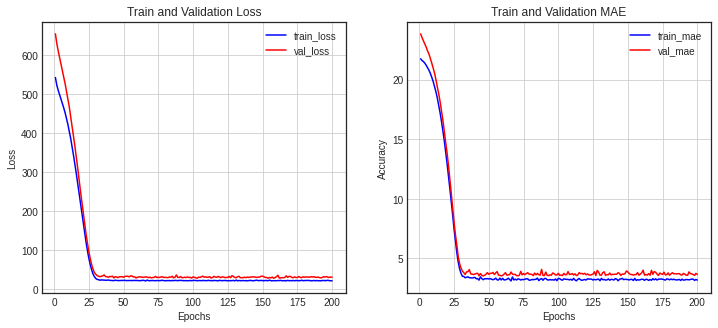

In [6]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

### train_loss, val_loss 비교를 위한 그래프 작성
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

### train_mae, val_mae 비교를 위한 그래프 작성
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

### <span style = "background-color: #FFDDE5"> 모델 평가 및 예측</span>
---
- 테스트 데이터를 가져와 모델 성능을 평가해 보겠습니다.

In [7]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 3ms/step - loss: 22.7024 - mae: 3.3286


[22.702411651611328, 3.3286046981811523]

---
**회고록**  
3개의 Dense 레이어로 구성된 모델을 이용한 학습 결과, 제시된 시각화 그래프와 유사한 양상을 보였다.  
training 초기에는(epochs 약 30 이하) loss와 error 값이 크게 수직하향하여 학습 성능이 크게 향상되는 것처럼 보이나, 이후에는(epochs 약 30 이상) 성능 향상이 거의 없는 것으로 확인되었다.  

이전까지의 프로젝트는 제시된 학습 모델 코드를 그대로 활용하는 방식으로 TensorFlow 프로그래밍에 관한 이해도를 높이기 어려웠는데,  
이번 프로젝트에서는 간단한 구조의 모델나마 직접 코드를 작성하고 구현해볼 수 있어서 굉장히 뿌듯했다 🥹